In [16]:
# Import Packages
import os
import earthaccess
import netCDF4 as nc
from osgeo import gdal
import pandas as pd
import numpy as np
import xarray as xr
import hvplot.pandas
import hvplot.xarray
import holoviews as hv
import sys
sys.path.append('modules/')
import emit_tools


In [27]:
earthaccess.login(persist=True)

In [28]:
fp = 'data/EMIT_L2A_RFL_001_20220810T174213_2222212_001.nc'
fp_mask = 'data/EMIT_L2A_MASK_001_20220810T174213_2222212_001.nc'

In [29]:

fp = 'data/EMIT_L2A_RFL_001_20220810T174213_2222212_001.nc'
fp_mask = 'data/EMIT_L2A_MASK_001_20220810T174213_2222212_001.nc'

mask_parameters_ds = xr.open_dataset(fp_mask,engine = 'h5netcdf', group='sensor_band_parameters')
mask_key = mask_parameters_ds['mask_bands'].to_dataframe()
mask_key

,mask_bands
bands,
0,Cloud flag
1,Cirrus flag
2,Water flag
3,Spacecraft Flag
4,Dilated Cloud Flag
5,AOD550
6,H2O (g cm-2)
7,Aggregate Flag


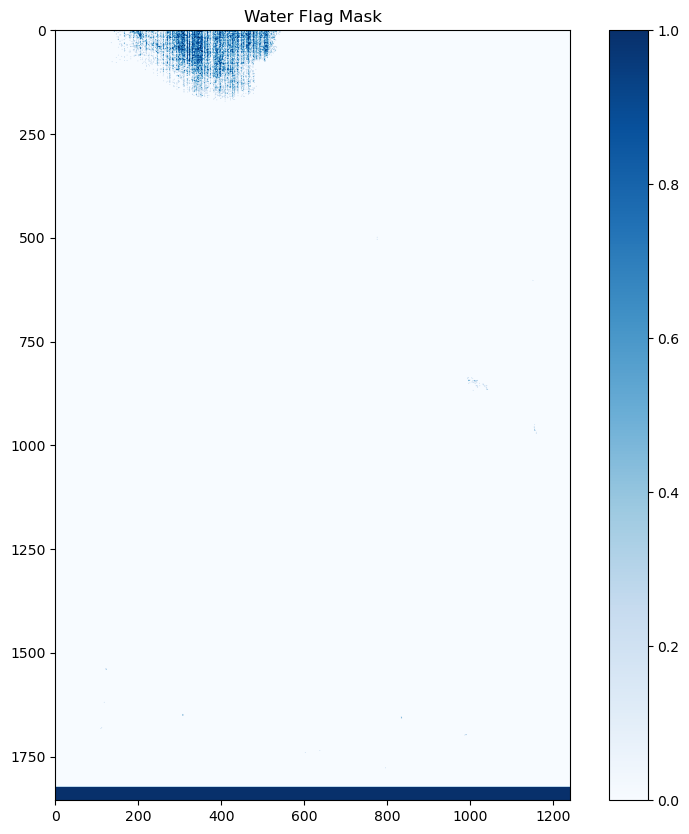

In [30]:
# Assuming you have already loaded the mask dataset (fp_mask) earlier in the tutorial
mask_ds = emit_tools.emit_xarray(fp_mask, ortho=False)

# Plot only the water flag mask (which is band 4, indexed as 3)
water_flag = mask_ds['mask'].values[..., 3]  # 3 corresponds to band 4 in the file (0-indexed)

# Plot the water flag mask
plt.figure(figsize=(10, 10))
plt.imshow(water_flag, cmap='Blues', aspect='equal')
plt.title('Water Flag Mask')
plt.colorbar()
plt.show()



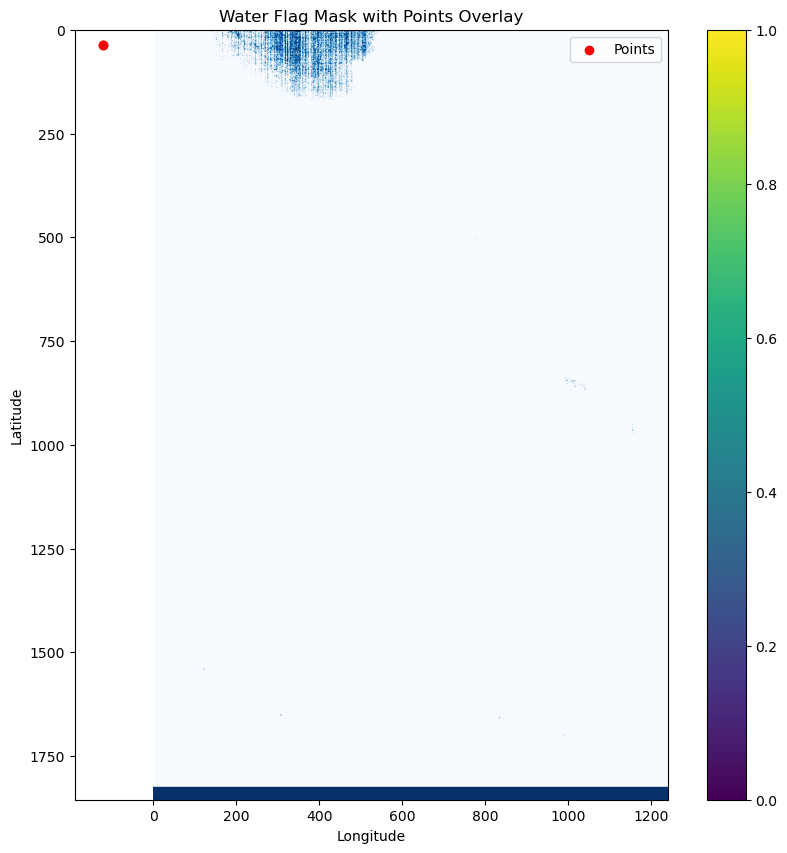

In [31]:
# Load points from your CSV file
points = pd.read_csv('data/coords.csv')

# Plot the water flag mask
plt.figure(figsize=(10, 10))
plt.imshow(water_flag, cmap='Blues', aspect='equal')

# Overlay the points on the water flag mask
plt.scatter(points['Longitude'], points['Latitude'], c='red', marker='o', label='Points')

plt.title('Water Flag Mask with Points Overlay')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.colorbar()
plt.show()
